In [61]:
import keras
from keras.api import layers
from keras.api.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

In [88]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"

INPUT_SHAPE = (70, 70)
CLASSES = 43

EPOCHS = 20

Loading Files and Dataset ...
Found Categories : ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 50, 50)
X-Test : (860, 50, 50)
Y-Train : (3439,)
Y-Test : (860,)


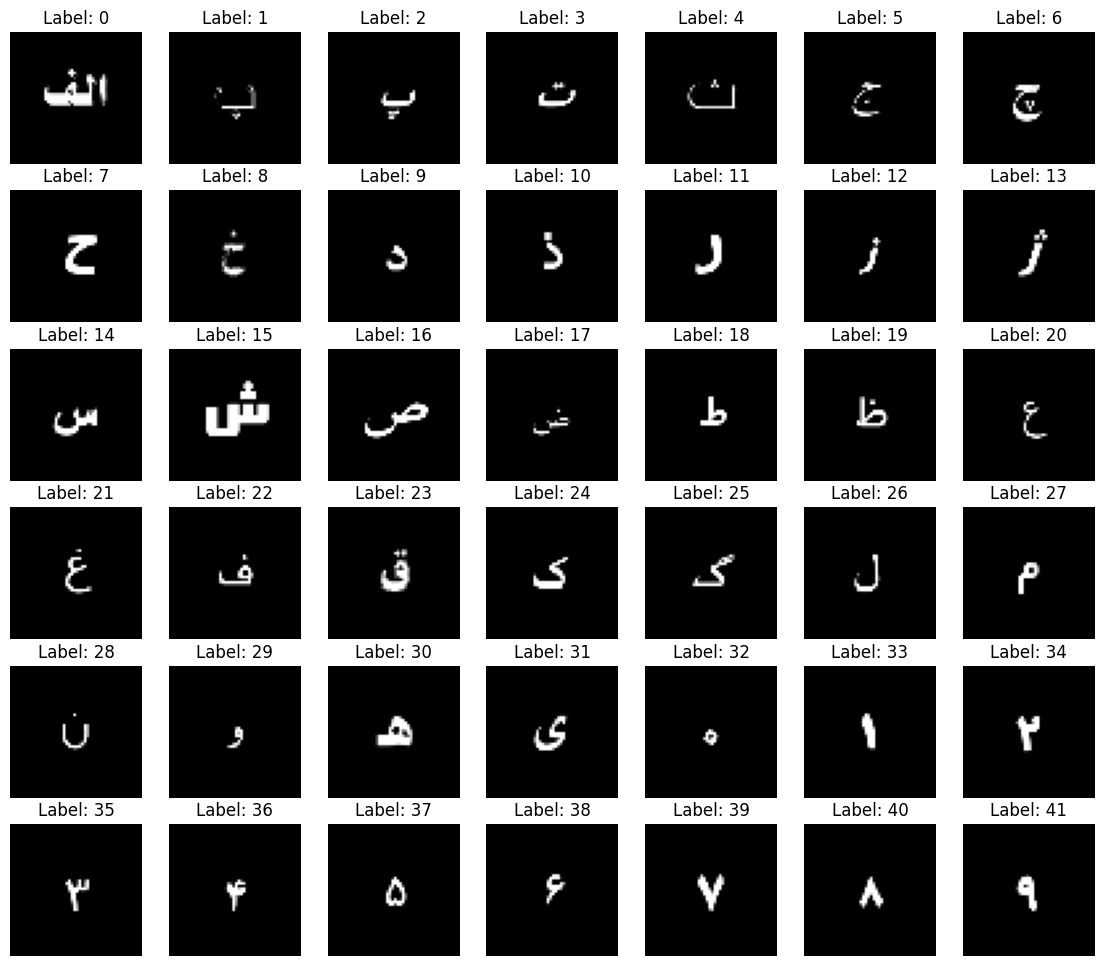

In [80]:
dataloader = DataLoader(path=DATASET1, image_size=INPUT_SHAPE[0], padding=0, invert=True)
X, y = dataloader.load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [74]:
model_1 = Sequential(name='Model-1')

model_1.add(layers.Input(shape=INPUT_SHAPE))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=2048, activation='relu', use_bias=True, name='Dense_1'))
model_1.add(layers.Dense(units=1024, activation='relu', use_bias=True, name='Dense_2'))
model_1.add(layers.Dense(units=512, activation='relu', use_bias=True, name='Dense_3'))
model_1.add(layers.Dense(units=256, activation='relu', use_bias=True, name='Dense_4'))
model_1.add(layers.Dense(units=128, activation='relu', use_bias=True, name='Dense_5'))
model_1.add(layers.Dense(units=64, activation='relu', use_bias=True, name='Dense_6'))
model_1.add(layers.Dense(units=CLASSES, activation='softmax', use_bias=True, name='Dense_7'))

model_1.summary()

Model: "Model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 2048)           │     5,122,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_7 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,920,299 (30.21 MB)

 Trainable params: 7,920,299 (30.21 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model_1.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test))

history_df_1 = pd.DataFrame({
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})


display(history_df_1)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9752 - loss: 0.0754 - val_accuracy: 0.8733 - val_loss: 0.7776
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9777 - loss: 0.0575 - val_accuracy: 0.8849 - val_loss: 0.7224
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9760 - loss: 0.0713 - val_accuracy: 0.8500 - val_loss: 0.8746
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9635 - loss: 0.1260 - val_accuracy: 0.8767 - val_loss: 0.7060
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9931 - loss: 0.0224 - val_accuracy: 0.8849 - val_loss: 0.6973
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9905 - loss: 0.0226 - val_accuracy: 0.8744 - val_loss: 0.7432
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9694 - loss: 0.0873 - val_accuracy: 0.8558 - val_loss: 0.8209
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9635 - loss: 0.1043 - val_accu

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,0.982844,0.873256,0.053528,0.777587
1,0.976447,0.884884,0.062293,0.722419
2,0.966560,0.850000,0.111391,0.874643
3,0.976737,0.876744,0.078257,0.706025
4,0.993312,0.884884,0.020385,0.697267
5,0.989823,0.874419,0.027147,0.743199
6,0.965979,0.855814,0.100711,0.820855
7,0.970340,0.879070,0.082923,0.737315
8,0.987787,0.886047,0.032865,0.697502
9,0.997383,0.875581,0.009256,0.856494


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


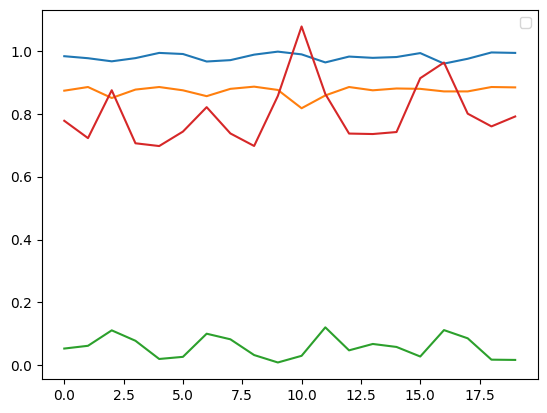

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8983 - loss: 0.5989
Model 1 Test Accuracy: 0.8837
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


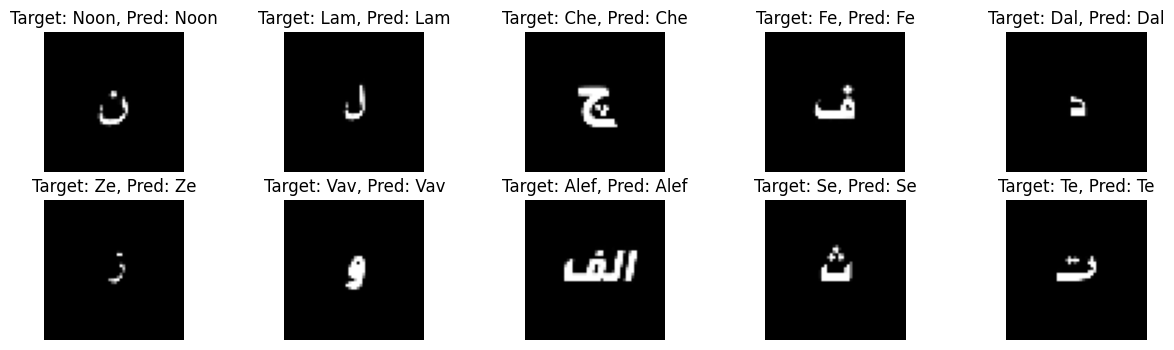

In [90]:
plt.plot(history_df_1)
plt.legend()
plt.show()


test_loss_1, test_acc_1 = model_1.evaluate(X_test, y_test)
print(f'Model 1 Test Accuracy: {test_acc_1:.4f}')

predictions = model_1.predict(X_test)

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions[i])]}')
    plt.axis('off')
    counter+=1
plt.show()